In [28]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np
import mlflow

In [29]:
train = pd.read_csv('../data/train.csv')

In [30]:
X = train.drop(columns=[
    'ID', 'target1', 'target2', 'target3', 'target4', 'target5',
    'target6', 'target7', 'target8', 'target9', 'target10', 'target11'
])

y = train.drop(columns=[
    'ID', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
    'feature7', 'feature8', 'feature9', 'feature10', 'feature11',
    'feature12', 'feature13', 'feature14', 'feature15'
])


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import xgboost as xgb  # ou qualquer outro modelo que você use

# Supondo que você já tenha definido X (DataFrame) e y (Series ou array)

kf = KFold(n_splits=10, shuffle=True, random_state=42)
errors_per_fold = []

# Loop de CV, coletando o erro absoluto de cada amostra de validação
for fold, (train_idx, val_idx) in enumerate(kf.split(X), start=1):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    params = {
            'n_estimators': 1923,
            'learning_rate': 0.0176491247294085,
            'max_depth': 7,
            'min_child_weight': 1,
            'subsample': 0.7565637963621075,
            'reg_alpha': 2.4180671613496878e-06,
            'reg_lambda': 4.3213853733170415,
            'gamma': 0.0017610181848471591,
            'random_state': 42,
            'n_jobs': 1,
            'tree_method': 'hist',       # para usar GPU corretamente em XGBoost >= 2.0
            'device': 'cuda'             # ativa a GPU
        }
    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    abs_errors = np.abs(y_val.values - y_pred)  # vetor 1D de erros
    errors_per_fold.append(abs_errors)



In [32]:
def plot_errors_subplots(model):
    """Plota cada fold em um subplot separado"""
    
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))  # 2 linhas, 5 colunas
    axes = axes.flatten()
    
    for fold, abs_errors in enumerate(errors_per_fold):
        ax = axes[fold]
        
        # Se multi-target, calcular erro médio por amostra
        if len(abs_errors.shape) > 1 and abs_errors.shape[1] > 1:
            # Multi-target: erro médio de todos os targets por amostra
            errors = np.mean(abs_errors, axis=1)
            ylabel = 'RMSE (Multi-Target)'
        else:
            # Single-target: usar erro como está
            errors = abs_errors.flatten()
            ylabel = 'Erro Absoluto'
        
        sample_numbers = range(1, len(errors) + 1)
        
        ax.plot(sample_numbers, errors, 'b-', alpha=0.7, linewidth=0.8)
        ax.scatter(sample_numbers, errors, c='red', s=10, alpha=0.6)
        
        ax.set_title(f'Fold {fold + 1}')
        ax.set_xlabel('Número da Amostra')
        ax.set_ylabel(ylabel)
        ax.grid(True, alpha=0.3)
        
        # Estatísticas no plot
        mean_error = np.mean(errors)
        ax.axhline(y=mean_error, color='green', linestyle='--', 
                  label=f'Média: {mean_error:.3f}')
        ax.legend(fontsize=8)
    
    plt.tight_layout()
    plt.suptitle(f'{model} - Erros de Validação por Fold', fontsize=16, y=1.02)
    plt.show()


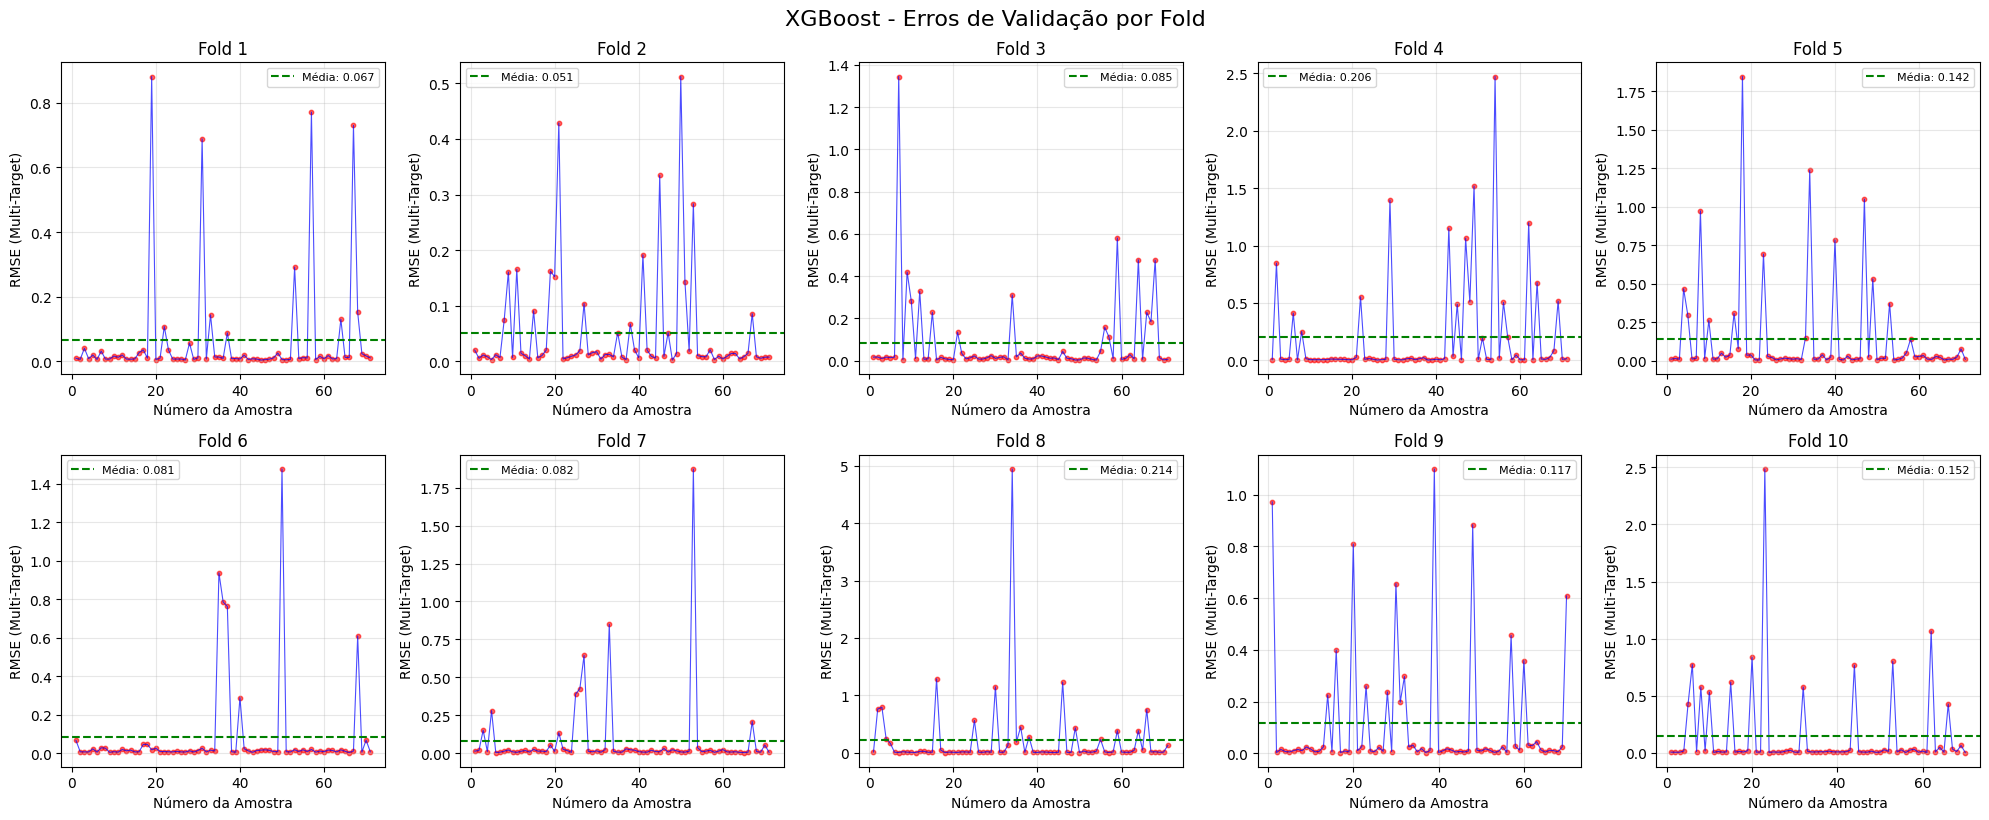

In [33]:
plot_errors_subplots("XGBoost")

In [34]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np
import mlflow
import warnings
from sklearn.metrics import root_mean_squared_error

# Supondo que você já tenha definido X (DataFrame) e y (Series ou array)

kf = KFold(n_splits=10, shuffle=True, random_state=42)
errors_per_fold = []

# Loop de CV, coletando o erro absoluto de cada amostra de validação
for fold, (train_idx, val_idx) in enumerate(kf.split(X), start=1):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    params = {'n_estimators': 1294, 'max_depth': 30, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': False}
    model = RandomForestRegressor(**params)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_val)
    
    abs_errors = np.abs(y_val.values - y_pred)  # vetor 1D de erros
    errors_per_fold.append(abs_errors)



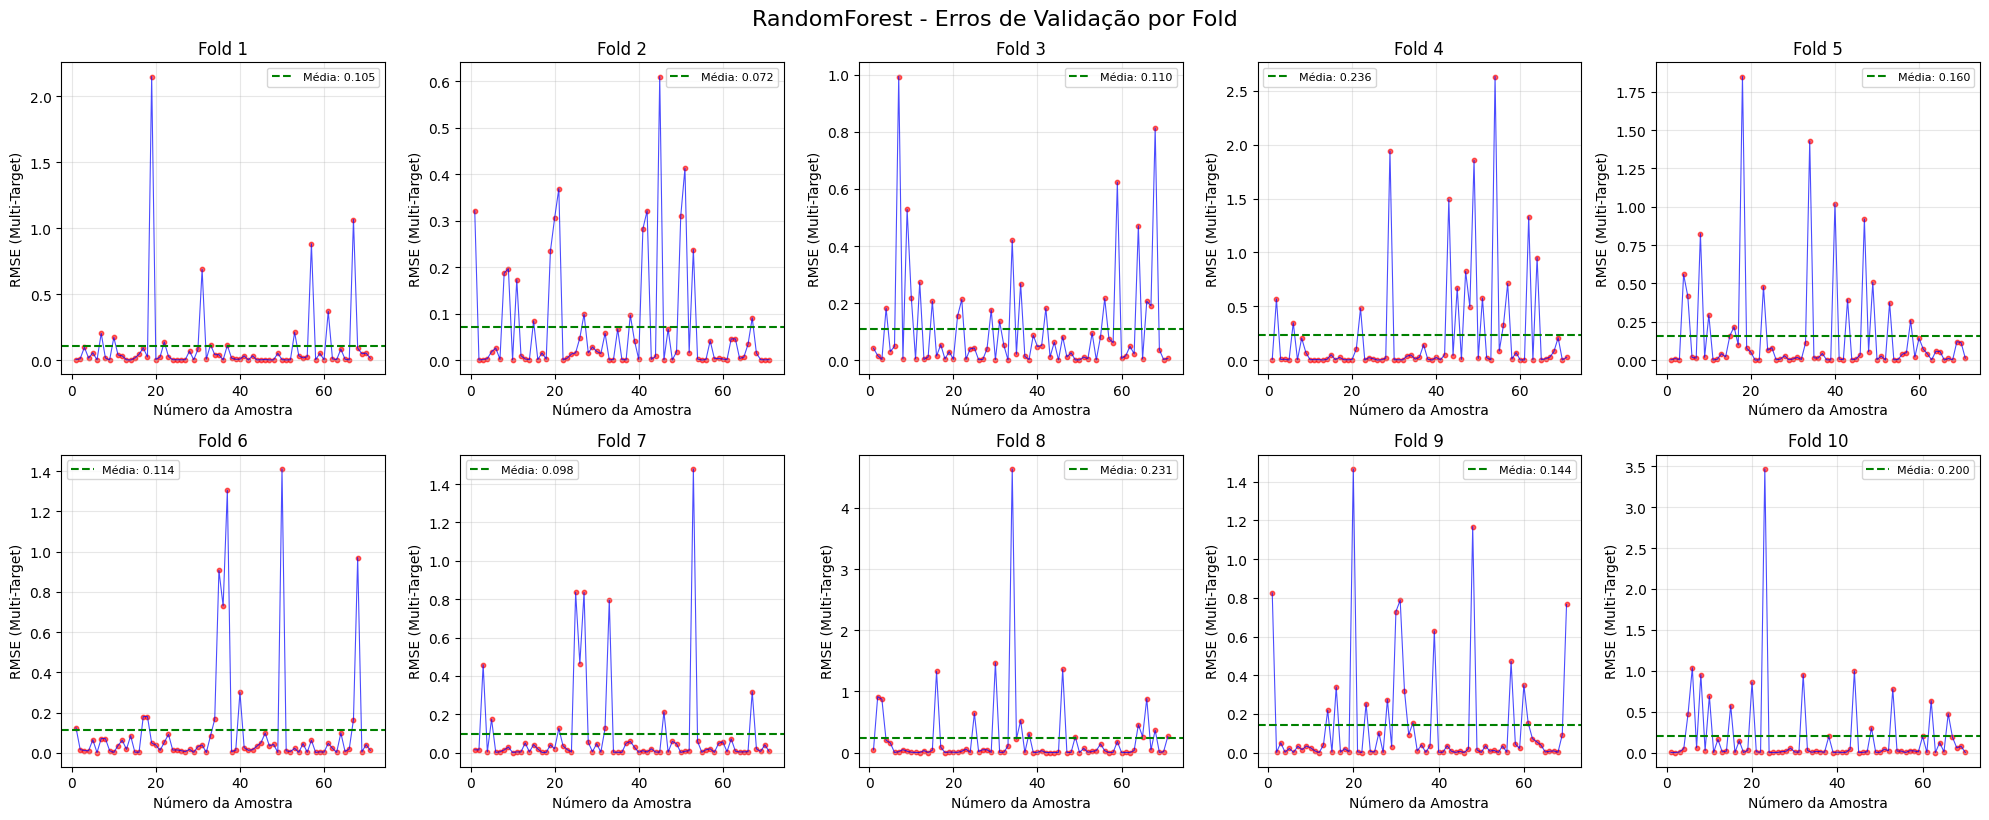

In [35]:
plot_errors_subplots("RandomForest")

In [39]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np
import mlflow
import warnings
from sklearn.metrics import root_mean_squared_error
from sklearn.neural_network import MLPRegressor

# Supondo que você já tenha definido X (DataFrame) e y (Series ou array)

kf = KFold(n_splits=10, shuffle=True, random_state=42)
errors_per_fold = []

# Loop de CV, coletando o erro absoluto de cada amostra de validação
for fold, (train_idx, val_idx) in enumerate(kf.split(X), start=1):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    params = {'activation': 'relu', 'solver': 'adam', 'alpha': 0.0019676546308791515, 'learning_rate': 'constant', 'max_iter': 416}
    
    model = MLPRegressor(**params)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_val)
    
    abs_errors = np.abs(y_val.values - y_pred)  # vetor 1D de erros
    errors_per_fold.append(abs_errors)



c:\Users\Guilherme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (416) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Guilherme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (416) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Guilherme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (416) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Guilherme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (416) reac

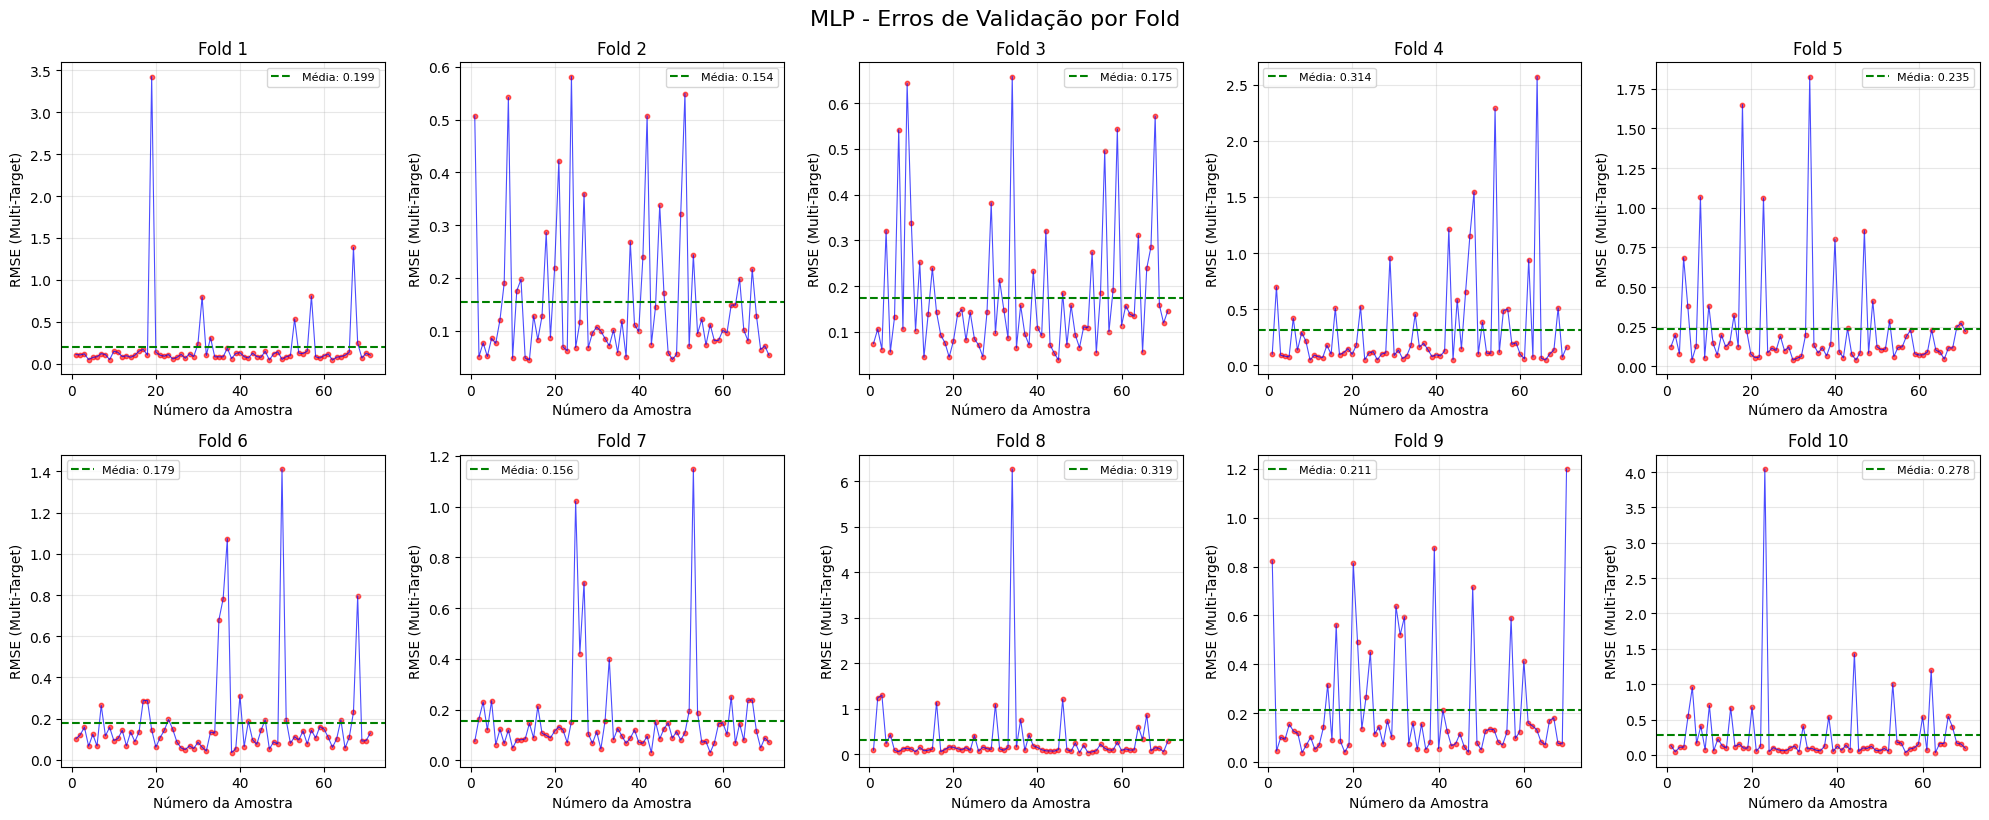

In [40]:
plot_errors_subplots("MLP")